# Data z pd pyth3 df do sqlite3

In [54]:
import sqlite3
import pandas as pd
import numpy as np
import string as st
import datetime
import seaborn as sns

In [24]:
con = sqlite3.connect(':memory:')

In [146]:
np.random.seed(42)
data = np.random.randint(1, 100, size = (1000, 5))
data

array([[52, 93, 15, 72, 61],
       [21, 83, 87, 75, 75],
       [88, 24,  3, 22, 53],
       ...,
       [94, 22, 33, 30, 81],
       [32, 42, 78, 10, 36],
       [34, 73, 28, 11, 78]])

In [147]:
data.shape

(1000, 5)

In [148]:
data.size

5000

In [149]:
data.dtype

dtype('int64')

In [150]:
st.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [151]:
numCols=data.shape[1]
abc=list(st.ascii_uppercase[:numCols])
abc

['A', 'B', 'C', 'D', 'E']

In [152]:
i = pd.date_range(start=datetime.datetime.now().date(), periods=data.shape[0], freq='D')
i

DatetimeIndex(['2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
               '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15',
               '2025-03-16', '2025-03-17',
               ...
               '2027-11-23', '2027-11-24', '2027-11-25', '2027-11-26',
               '2027-11-27', '2027-11-28', '2027-11-29', '2027-11-30',
               '2027-12-01', '2027-12-02'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [153]:
df = pd.DataFrame(data, columns = abc, index = i)
df

,A,B,C,D,E
2025-03-08,52,93,15,72,61
2025-03-09,21,83,87,75,75
2025-03-10,88,24,3,22,53
2025-03-11,2,88,30,38,2
2025-03-12,64,60,21,33,76
...,...,...,...,...,...
2027-11-28,13,32,46,23,45
2027-11-29,17,85,66,6,18
2027-11-30,94,22,33,30,81
2027-12-01,32,42,78,10,36


In [154]:
df.to_sql(con=con, name='Moje1', if_exists='replace')

1000

In [155]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data

[('2025-03-08 00:00:00', 52, 93, 15, 72, 61),
 ('2025-03-09 00:00:00', 21, 83, 87, 75, 75),
 ('2025-03-10 00:00:00', 88, 24, 3, 22, 53),
 ('2025-03-11 00:00:00', 2, 88, 30, 38, 2),
 ('2025-03-12 00:00:00', 64, 60, 21, 33, 76),
 ('2025-03-13 00:00:00', 58, 22, 89, 49, 91),
 ('2025-03-14 00:00:00', 59, 42, 92, 60, 80),
 ('2025-03-15 00:00:00', 15, 62, 62, 47, 62),
 ('2025-03-16 00:00:00', 51, 55, 64, 3, 51),
 ('2025-03-17 00:00:00', 7, 21, 73, 39, 18),
 ('2025-03-18 00:00:00', 4, 89, 60, 14, 9),
 ('2025-03-19 00:00:00', 90, 53, 2, 84, 92),
 ('2025-03-20 00:00:00', 60, 71, 44, 8, 47),
 ('2025-03-21 00:00:00', 35, 78, 81, 36, 50),
 ('2025-03-22 00:00:00', 4, 2, 6, 54, 4),
 ('2025-03-23 00:00:00', 54, 93, 63, 18, 90),
 ('2025-03-24 00:00:00', 44, 34, 74, 62, 14),
 ('2025-03-25 00:00:00', 95, 48, 15, 72, 78),
 ('2025-03-26 00:00:00', 87, 62, 40, 85, 80),
 ('2025-03-27 00:00:00', 82, 53, 24, 26, 89),
 ('2025-03-28 00:00:00', 60, 41, 29, 15, 45),
 ('2025-03-29 00:00:00', 65, 89, 71, 9, 88),
 (

In [156]:
df = pd.read_sql(con=con, sql='select * from Moje1')
df

,index,A,B,C,D,E
0,2025-03-08 00:00:00,52,93,15,72,61
1,2025-03-09 00:00:00,21,83,87,75,75
2,2025-03-10 00:00:00,88,24,3,22,53
3,2025-03-11 00:00:00,2,88,30,38,2
4,2025-03-12 00:00:00,64,60,21,33,76
...,...,...,...,...,...,...
995,2027-11-28 00:00:00,13,32,46,23,45
996,2027-11-29 00:00:00,17,85,66,6,18
997,2027-11-30 00:00:00,94,22,33,30,81
998,2027-12-01 00:00:00,32,42,78,10,36


In [157]:
df.dtypes

index    object
A         int64
B         int64
C         int64
D         int64
E         int64
dtype: object

In [158]:
df.index = df['index']
df.drop(columns=['index'], inplace=True)
df

,A,B,C,D,E
index,,,,,
2025-03-08 00:00:00,52,93,15,72,61
2025-03-09 00:00:00,21,83,87,75,75
2025-03-10 00:00:00,88,24,3,22,53
2025-03-11 00:00:00,2,88,30,38,2
2025-03-12 00:00:00,64,60,21,33,76
...,...,...,...,...,...
2027-11-28 00:00:00,13,32,46,23,45
2027-11-29 00:00:00,17,85,66,6,18
2027-11-30 00:00:00,94,22,33,30,81


In [159]:
df.index.dtype

dtype('O')

In [160]:
df.index = pd.to_datetime(df.index)
df

,A,B,C,D,E
index,,,,,
2025-03-08,52,93,15,72,61
2025-03-09,21,83,87,75,75
2025-03-10,88,24,3,22,53
2025-03-11,2,88,30,38,2
2025-03-12,64,60,21,33,76
...,...,...,...,...,...
2027-11-28,13,32,46,23,45
2027-11-29,17,85,66,6,18
2027-11-30,94,22,33,30,81


In [161]:
df.index.dtype

dtype('<M8[ns]')

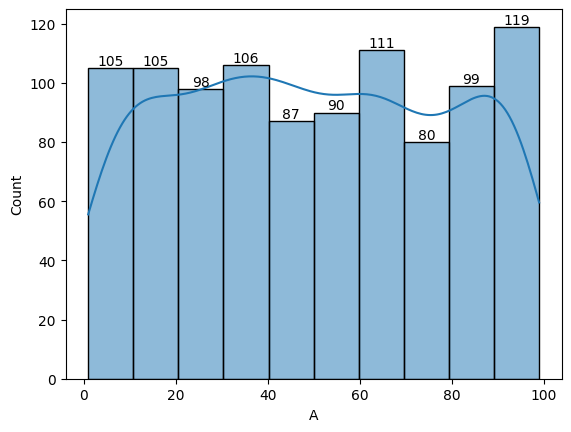

In [162]:
ax = sns.histplot(df['A'], bins=10, kde=True)
for container in ax.containers:
    ax.bar_label(container)

In [163]:
hist, bin_edges = np.histogram(df['A'], bins=10)

In [164]:
hist

array([105, 105,  98, 106,  87,  90, 111,  80,  99, 119])

In [165]:
bin_edges

array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ])

In [166]:
df['A'].min()

1

In [167]:
df['A'].max()

99

In [169]:
df['A CAT'] = pd.cut(df['A'], bins=bin_edges, right=False)

In [171]:
df['A CAT'].value_counts(sort=False)

A CAT
[1.0, 10.8)     105
[10.8, 20.6)    105
[20.6, 30.4)     98
[30.4, 40.2)    106
[40.2, 50.0)     87
[50.0, 59.8)     90
[59.8, 69.6)    111
[69.6, 79.4)     80
[79.4, 89.2)     99
[89.2, 99.0)    100
Name: count, dtype: int64

In [178]:
df[df['A CAT'].isna()]

,A,B,C,D,E,A CAT
index,,,,,,
2025-04-05,99,47,78,3,1,NaN
2025-05-06,99,19,48,80,3,NaN
2025-05-09,99,89,99,25,93,NaN
2025-05-29,99,50,25,24,13,NaN
2025-12-16,99,86,24,81,74,NaN
2026-07-09,99,98,33,21,81,NaN
2026-08-16,99,41,6,25,13,NaN
2026-09-06,99,60,11,63,21,NaN
2026-10-04,99,32,94,39,12,NaN
